# ECE4960 Project3 - Plot Script

In [206]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Y_model with given parameters
def Ymodel(para):
    VT = 0.026
    Is, Kapa, Vth = para[0], para[1], para[2]
    exp1 = np.exp((Kapa*(Vgs - Vth))/(2*VT))
    exp2 = np.exp((Kapa*(Vgs - Vth) - Vds) / (2*VT))
    yModel = Is * (np.log(1+exp1) * np.log(1+exp1) - np.log(1+exp2) * np.log(1+exp2))
    return yModel

# Task 2, 5, 7: Plot the normalized data
def plot(zoomIn, title, task):
    plt.figure(figsize=(12, 9))  
    plt.rcParams.update({'font.size':13})
    Vgs = 0.5
    i = 0
    for batch in groupByVgs:
        Vds = []
        two = []
        Ids = []
        if task is 5:
            if zoomIn is 0:
                for array in batch:
                    Vds.append(array[0])
                    two.append(array[5])
            if zoomIn > 0:
                if i>1:
                    for array in batch:
                        Vds.append(array[0])
                        two.append(array[5])
            plt.plot(Vds, two, label="Vgs = "+str(Vgs)+"V",color = 'C'+str(i), linewidth=1.5)
        elif task is 2 or 7:
            for array in batch:
                Vds.append(array[0])
                Ids.append(array[1])
                two.append(array[2])
            plt.plot(Vds, Ids, label="Vgs = "+str(Vgs), color = 'C'+str(i), linewidth=1.5)
            plt.plot(Vds, two, label="Model Vgs = "+str(Vgs)+"V",color = 'C'+str(i), linestyle='--', linewidth=1.5)
        Vgs += 0.5
        i += 1
    plt.xlabel("Vds (V)")
    plt.ylabel("Ids ")
    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()


# Read NMOS measure data from .txt
NMOSdata = np.genfromtxt('outputNMOS.txt')[1:]
Vgs, Vds, yMeasure = NMOSdata[:, 0],NMOSdata[:, 1], NMOSdata[:, 2]

# The parameters extracted from Task 4
paraQN = [2.068457699371618E-6, 0.5981751886140722, 0.9382194923540036]
paraSC = [2.0038732484002615E-6, 0.60116197452008, 0.9017429617801213]

# The Y_model and their normalized form; append them to the NMOSdata
# NMOSdata = [Vgs, Vds, yMeasure, yModelQN, yModelSC, NormalyModelQN, NormalyModelSC]
yModelQN = Ymodel(paraQN)
yModelSC = Ymodel(paraSC)
NormalyModelQN = np.divide(yModelQN, yMeasure)
NormalyModelSC = np.divide(yModelSC, yMeasure)
NMOSdata = np.insert(NMOSdata, 3, yModelQN, axis=1)
NMOSdata = np.insert(NMOSdata, 4, yModelSC, axis=1)
NMOSdata = np.insert(NMOSdata, 5, NormalyModelQN, axis=1)
NMOSdata = np.insert(NMOSdata, 5, NormalyModelSC, axis=1)

# Separate the NMOSdata according to different Vgs
groupByVgs = [[] for i in range(10)]
for tuple in NMOSdata:
    groupByVgs[int(tuple[0]/0.5-1.0)].append(tuple[1:])
    

## Task 3,7 -  S(measure) and S(model)

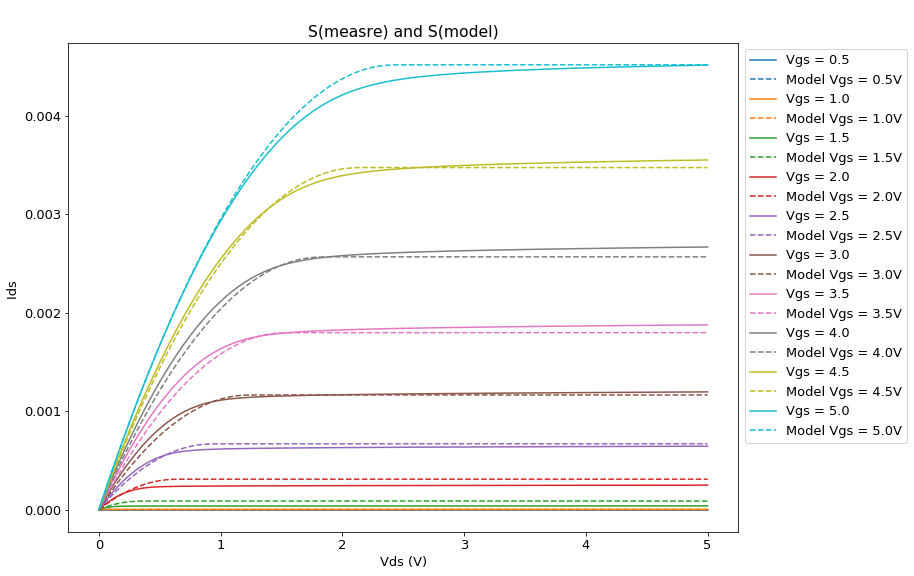

In [207]:
plot(1, "\nS(measre) and S(model)", 2)

## Task 5 - The Normalized Predicted Data

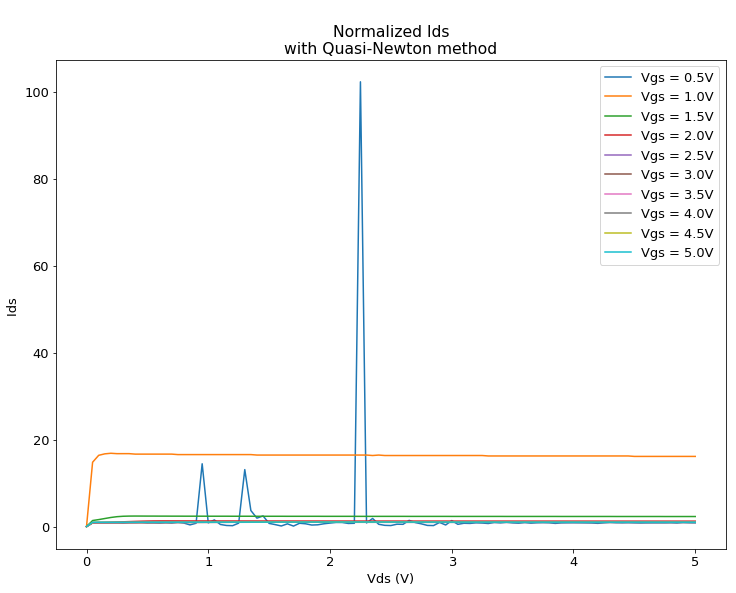

In [208]:
plot(0,"\nNormalized Ids\nwith Quasi-Newton method", 5)

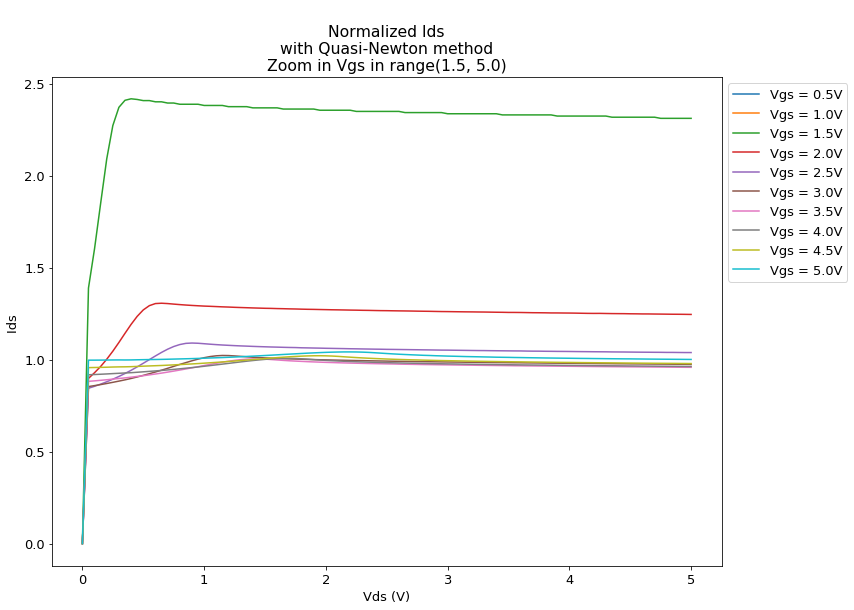

In [209]:
plot(1, "\nNormalized Ids\nwith Quasi-Newton method"+"\nZoom in Vgs in range(1.5, 5.0)", 5)

## Task 7 - Id's approximation vs. Vgs

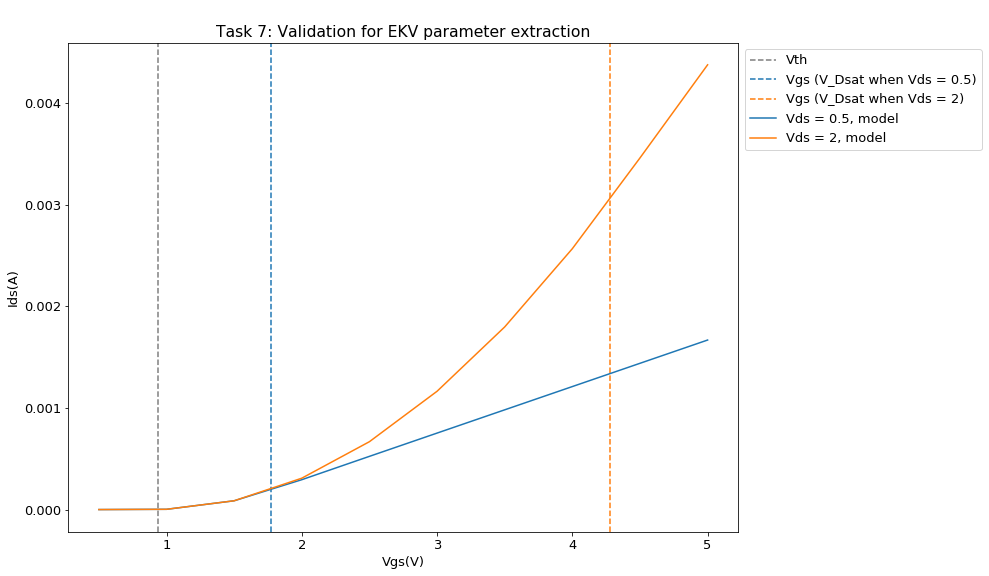

In [341]:
# Plot the approximation together with the real data

import math

Is_QN, Kapa_QN, Vth_QN = paraQN[0], paraQN[1], paraQN[2]

# Two different Vds
Vds1 = 0.5
Vds2 = 2

# Two Vgs for two vds's saturated value, Vgs(max) = Vds/kapa + Vth
Vgs_Bar_Vds1 = Vds1 / Kapa_QN + Vth_QN
Vgs_Bar_Vds2 = Vds2 / Kapa_QN + Vth_QN

# Extract the data with Vds = 1:
data_Id1, data_Vgs1, data_Vds1, data_Id2, data_Vgs2, data_Vds2 = [0]*10, [0]*10, [0]*10, [0]*10, [0]*10, [0]*10
i, j = 0, 0
for tuple in NMOSdata:
    if tuple[1] == Vds1:
        data_Id1[i], data_Vgs1[i], data_Vds1[i], i = tuple[3], tuple[0], tuple[1], i+1
    if tuple[1] == Vds2:
        data_Id2[j], data_Vgs2[j], data_Vds2[j], j = tuple[3], tuple[0], tuple[1], j+1
        
def plotPiece():
    plt.figure(figsize=(12, 9))  
    plt.rcParams.update({'font.size':13}) 
    
    # The model value:    
    plt.axvline(x=Vth_QN, label="Vth", color = 'tab:gray', linestyle='--')
    plt.axvline(x=Vgs_Bar_Vds1, label="Vgs (V_Dsat when Vds = "+str(Vds1)+")", color = 'C0', linestyle='--')
    plt.axvline(x=Vgs_Bar_Vds2, label="Vgs (V_Dsat when Vds = "+str(Vds2)+")", color = 'C1', linestyle='--')
    plt.plot(data_Vgs1, data_Id1, color = 'C0', linewidth=1.5, label="Vds = "+str(Vds1)+", model")
    plt.plot(data_Vgs2, data_Id2, color = 'C1', linewidth=1.5, label="Vds = "+str(Vds2)+", model")

    plt.xlabel("Vgs(V)")
    plt.ylabel("Ids(A)")
    plt.title("\nTask 7: Validation for EKV parameter extraction")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    
plotPiece()